# My New Jupyter Notebook

In [33]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
# Load the uploaded CSV file into a DataFrame for analysis
csv_file_path = 'C:\Sunil\learning\MarketScraper\market_scraper.products.csv'
products_df = pd.read_csv(csv_file_path)

# Display the first few rows to understand the structure of the dataset
products_df.head()


,_id,name,price,description,discount,scrapedAt,__v,originalPrice,reviews,rating,availability,badge,image
0,674b0b8c888a78dce3230cf1,NaN,NaN,NaN,NaN,2024-11-30T12:56:44.521Z,0,NaN,NaN,NaN,NaN,NaN,NaN
1,674b0b8c888a78dce3230cf5,"HP 14 inch Laptop, HD Display, 12th Generation...",$249.99$319.00,"FREE delivery Fri, Dec 6 Or fastest delivery M...",NaN,2024-11-30T12:56:44.535Z,0,NaN,NaN,NaN,NaN,NaN,NaN
2,674b0b8c888a78dce3230cf8,"15.6"" FHD IPS Business Laptop, 32GB RAM 1TB SS...",$379.00$779.99,Exclusive Prime priceFREE delivery Dec 10 - 16...,NaN,2024-11-30T12:56:44.538Z,0,NaN,NaN,NaN,NaN,NaN,NaN
3,674b0b8c888a78dce3230cfb,Acer Aspire 3 A315-24P-R7VH Slim Laptop | 15.6...,$279.99$321.99,"FREE delivery Fri, Dec 6 Or fastest delivery M...",NaN,2024-11-30T12:56:44.541Z,0,NaN,NaN,NaN,NaN,NaN,NaN
4,674b0b8c888a78dce3230cfe,Apple 2024 MacBook Air 13-inch Laptop with M3 ...,"$899.00$1,099.00$1,234.00$1,499.00$1,049.00$1,...",NaN,NaN,2024-11-30T12:56:44.543Z,0,NaN,NaN,NaN,NaN,NaN,NaN


## Add Cells to Notebook
In this section, we will add different types of cells (code, markdown) to the notebook.

### This is a Markdown Cell

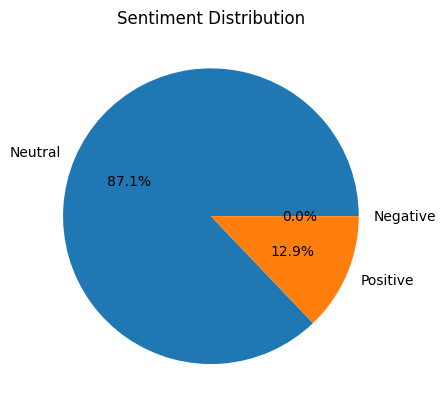

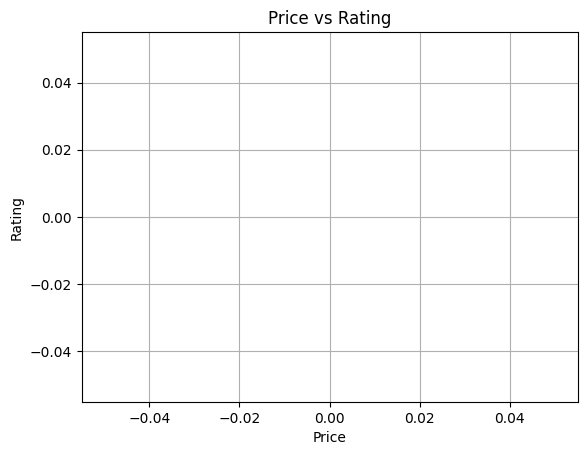

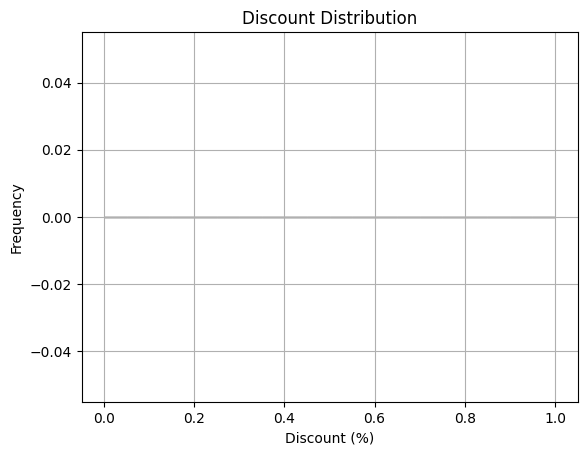

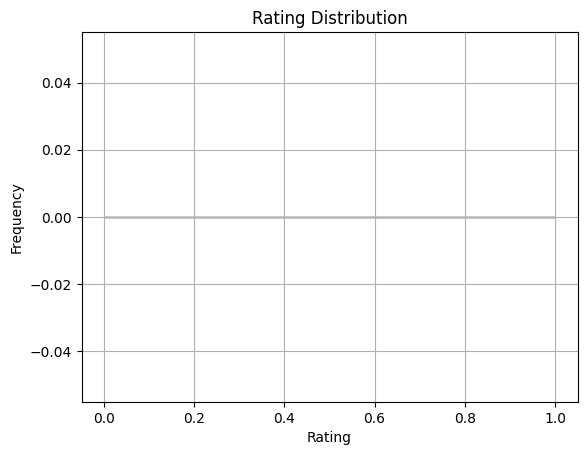

Top Products by Reviews:
                                                   name  reviews
1511  Womens Corduroy Overalls Adjustable Straps Bag...    427.0
1495  Summer Tank Tops Embroidery for Women Sleevele...     79.0
1104  Fabric Tape Double Sided for Clothes - Body Ta...     49.0
647   Lenovo 14" Business Laptop Computer, Windows 1...     38.0
657   15.6" Laptop Computer,16GB RAM 256GB SSD, Cele...     13.0
...                                                 ...      ...
1635  HP 17.3" FHD Business Laptop 2024, 32GB RAM, 1...      NaN
1636  Lenovo V15 G4 15.6" FHD Business Laptop Comput...      NaN
1637  LENOVO IdeaPad 3i Laptop, 15.6" HD Touchscreen...      NaN
1638  HP Newest Pavilion 15.6" HD Touchscreen Anti-G...      NaN
1639  HP 14 inch Laptop, HD Display, 12th Generation...      NaN

[1640 rows x 2 columns]


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Load the CSV file
file_path = 'C:\Sunil\learning\MarketScraper\market_scraper.products.csv'
data = pd.read_csv(file_path)

# Data Cleaning
data['price'] = data['price'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)  # Extract numerical price
data['originalPrice'] = data['originalPrice'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)
data['discount'] = data['discount'].astype(str).str.replace('%', '', regex=True).astype(float)
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
data['reviews'] = pd.to_numeric(data['reviews'], errors='coerce')

# Sentiment Analysis
def calculate_sentiment(description):
    if pd.notnull(description):
        return TextBlob(description).sentiment.polarity
    return 0

data['sentiment'] = data['description'].apply(calculate_sentiment)
data['sentiment_category'] = pd.cut(
    data['sentiment'], bins=[-1, -0.01, 0.01, 1], labels=['Negative', 'Neutral', 'Positive']
)

# Visualizations
# 1. Sentiment Analysis Pie Chart
sentiment_counts = data['sentiment_category'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

# 2. Price vs Rating Scatter Plot
plt.scatter(data['price'], data['rating'], alpha=0.5)
plt.title('Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

# 3. Discount Distribution
data['discount'].dropna().hist(bins=20, edgecolor='black')
plt.title('Discount Distribution')
plt.xlabel('Discount (%)')
plt.ylabel('Frequency')
plt.show()

# 4. Rating Distribution
data['rating'].dropna().hist(bins=10, edgecolor='black')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# 5. Top Products by Reviews
top_products = data.nlargest(10, 'reviews', 'all')[['name', 'reviews']]
print("Top Products by Reviews:")
print(top_products)


### Another Markdown Cell

In [35]:

%pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
def calculate_vader_sentiment(description):
    if pd.notnull(description):
        scores = analyzer.polarity_scores(description)
        return scores['compound']  # Use compound score for overall sentiment
    return 0
data['sentiment'] = data['description'].apply(calculate_vader_sentiment)


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download stopwords
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(description):
    if pd.notnull(description):
        description = re.sub(r'[^\w\s]', '', description)  # Remove special characters
        description = description.lower()  # Convert to lowercase
        tokens = description.split()  # Tokenize
        tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
        tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
        return " ".join(tokens)
    return ""

data['cleaned_description'] = data['description'].apply(preprocess_text)
data['weighted_sentiment'] = data['sentiment'] * data['reviews']
data['weighted_sentiment'].sum() / data['reviews'].sum()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


np.float64(0.0)


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: seaborn in c:\users\dell\appdata\local\programs\python\python311\lib\site-packages (0.13.2)



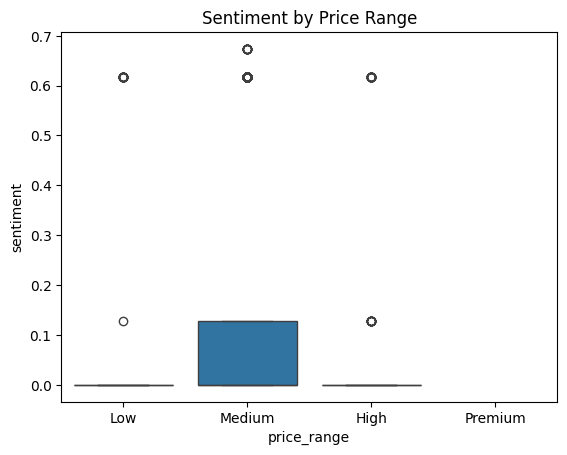

In [37]:
%pip install seaborn
import seaborn as sns

# Sentiment by Price Range
data['price_range'] = pd.cut(data['price'], bins=[0, 100, 500, 1000, 5000], labels=['Low', 'Medium', 'High', 'Premium'])
sns.boxplot(x='price_range', y='sentiment', data=data)
plt.title('Sentiment by Price Range')
plt.show()


In [39]:
data['sentiment_category'] = pd.cut(
    data['sentiment'], bins=[-1, -0.6, -0.2, 0.2, 0.6, 1], 
    labels=['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive']
)


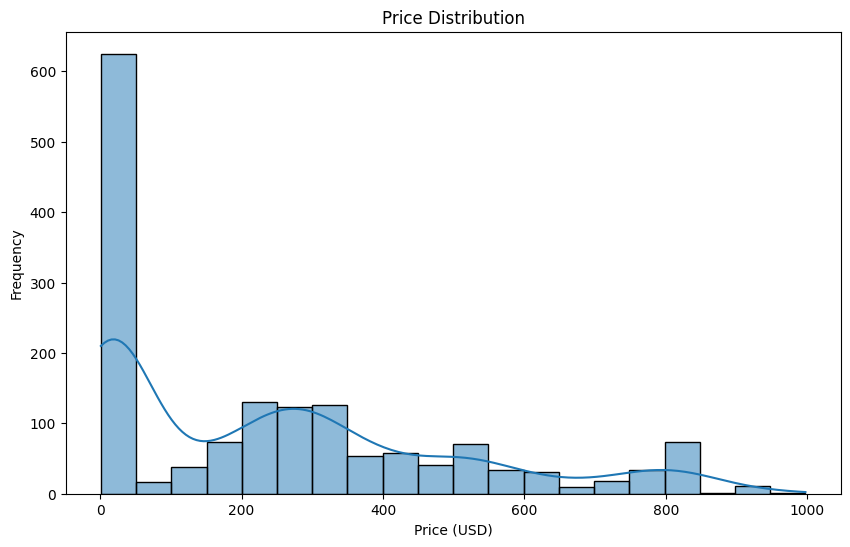

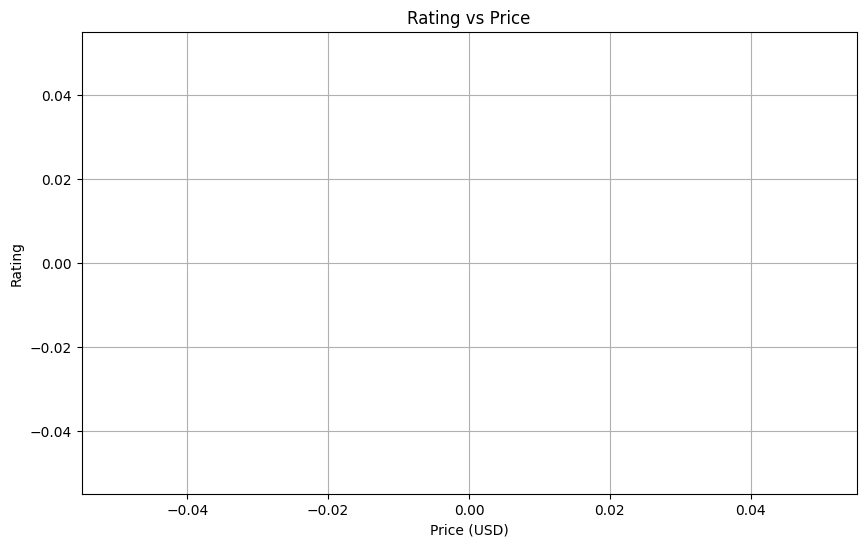

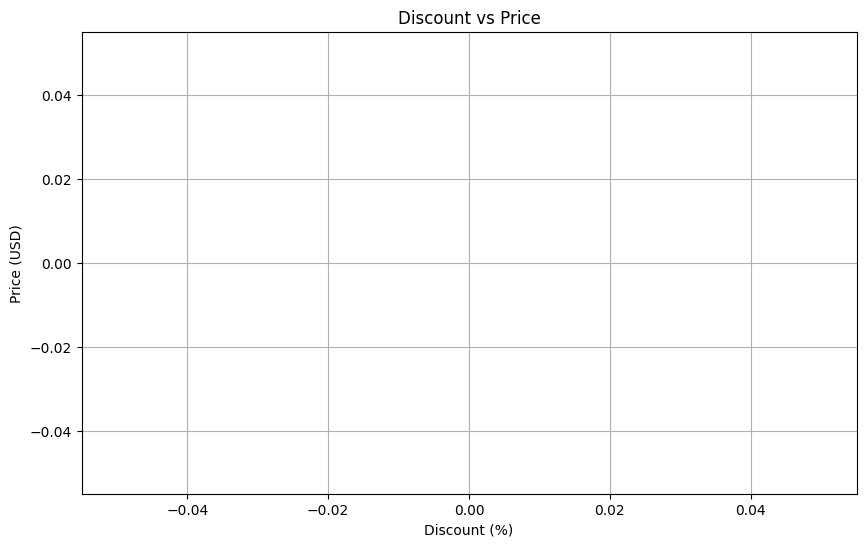

C:\Users\Dell\AppData\Local\Temp\ipykernel_12732\88385493.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='name', x='reviews_cleaned', data=top_reviews, palette='viridis')
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


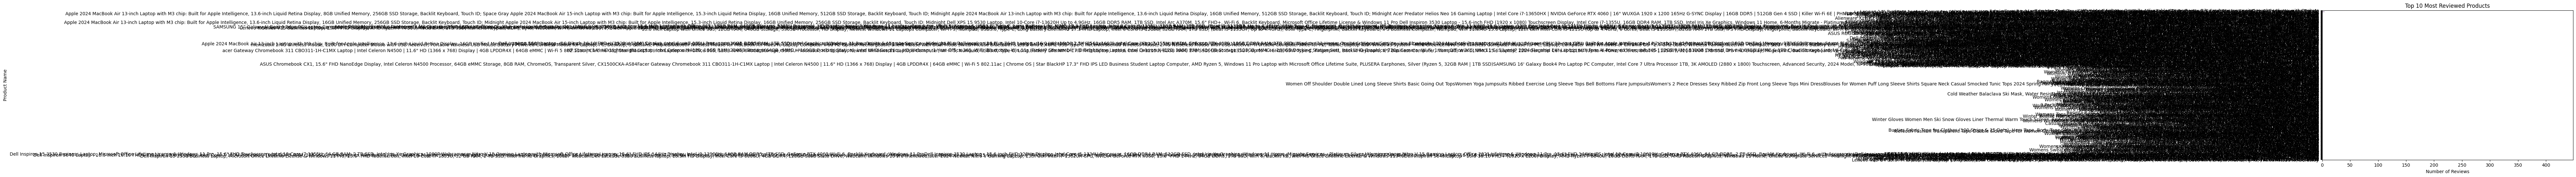

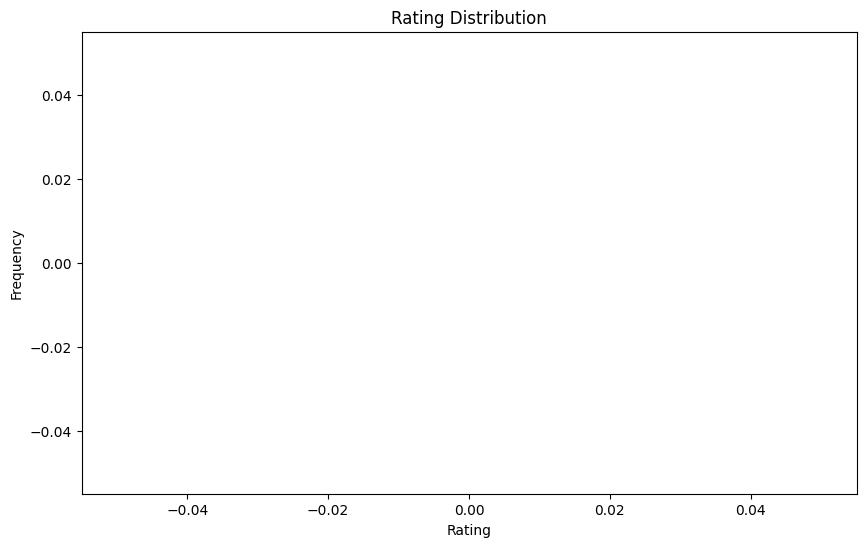

In [40]:
# Generate additional visualizations to explore the dataset further

import seaborn as sns
import matplotlib.pyplot as plt

# Ensure all fields are prepared for visualization
products_df['price'] = products_df['price'].astype(str)
products_df['discount'] = products_df['discount'].astype(str)
products_df['price_cleaned'] = products_df['price'].str.extract(r'(\d+\.?\d*)').astype(float)
products_df['rating_cleaned'] = pd.to_numeric(products_df['rating'], errors='coerce')
products_df['reviews_cleaned'] = pd.to_numeric(products_df['reviews'], errors='coerce')
products_df['discount_cleaned'] = products_df['discount'].str.replace('%', '', regex=True).astype(float)

# Visualization 1: Distribution of product prices
plt.figure(figsize=(10, 6))
sns.histplot(products_df['price_cleaned'].dropna(), bins=20, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

# Visualization 2: Rating vs. Price Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price_cleaned', y='rating_cleaned', data=products_df, alpha=0.7)
plt.title('Rating vs Price')
plt.xlabel('Price (USD)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

# Visualization 3: Discount vs. Price Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount_cleaned', y='price_cleaned', data=products_df, alpha=0.7)
plt.title('Discount vs Price')
plt.xlabel('Discount (%)')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

# Visualization 4: Top 10 Most Reviewed Products
top_reviews = products_df.nlargest(10, 'reviews_cleaned', 'all')[['name', 'reviews_cleaned']]
plt.figure(figsize=(10, 6))
sns.barplot(y='name', x='reviews_cleaned', data=top_reviews, palette='viridis')
plt.title('Top 10 Most Reviewed Products')
plt.xlabel('Number of Reviews')
plt.ylabel('Product Name')
plt.show()

# Visualization 5: Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(products_df['rating_cleaned'].dropna(), bins=10, kde=False)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_12732\416581374.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=badge_counts.index, y=badge_counts.values, palette='coolwarm')


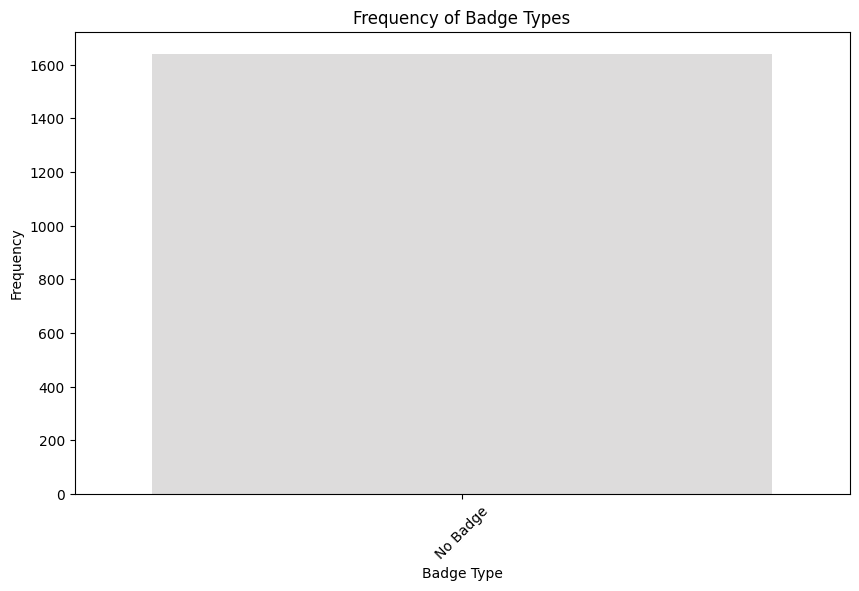

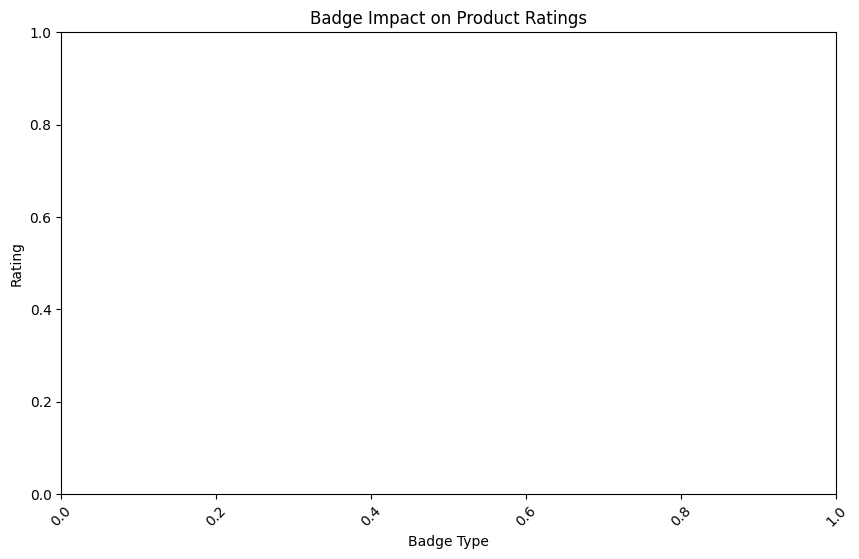

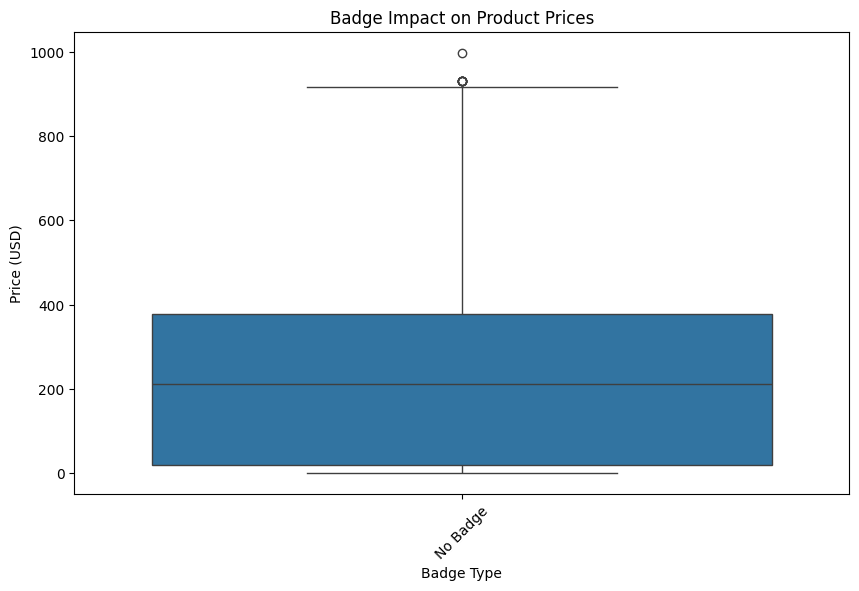

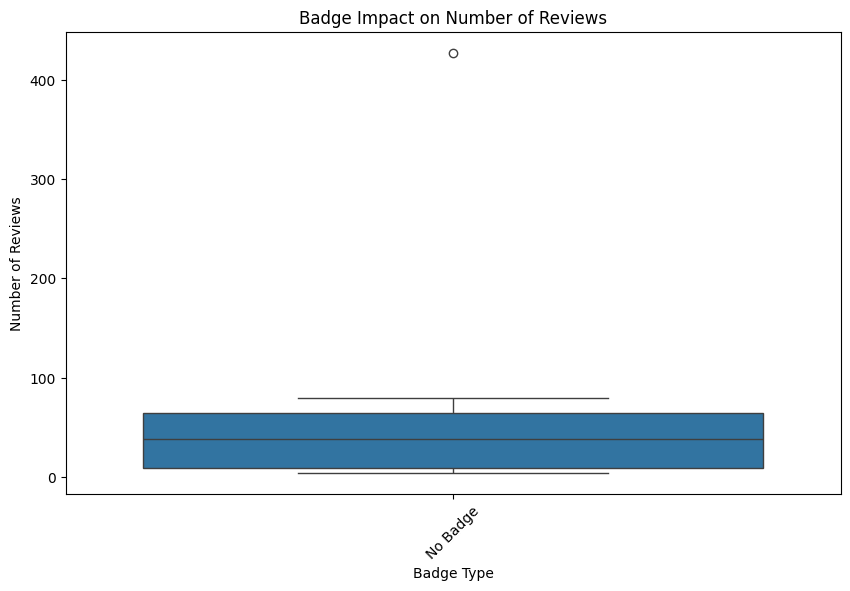

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Badge Analysis: Cleaning and Handling Missing Values
products_df['badge_cleaned'] = products_df['badge'].fillna('No Badge')

# 1. Frequency of Badge Types
badge_counts = products_df['badge_cleaned'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=badge_counts.index, y=badge_counts.values, palette='coolwarm')
plt.title('Frequency of Badge Types')
plt.xlabel('Badge Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# 2. Badge Impact on Product Ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='badge_cleaned', y='rating_cleaned', data=products_df.dropna(subset=['rating_cleaned']))
plt.title('Badge Impact on Product Ratings')
plt.xlabel('Badge Type')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

# 3. Badge Impact on Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='badge_cleaned', y='price_cleaned', data=products_df.dropna(subset=['price_cleaned']))
plt.title('Badge Impact on Product Prices')
plt.xlabel('Badge Type')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.show()

# 4. Badge Impact on Reviews
plt.figure(figsize=(10, 6))
sns.boxplot(x='badge_cleaned', y='reviews_cleaned', data=products_df.dropna(subset=['reviews_cleaned']))
plt.title('Badge Impact on Number of Reviews')
plt.xlabel('Badge Type')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_12732\1183303674.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=badge_avg_reviews.index, y=badge_avg_reviews.values, palette='coolwarm')


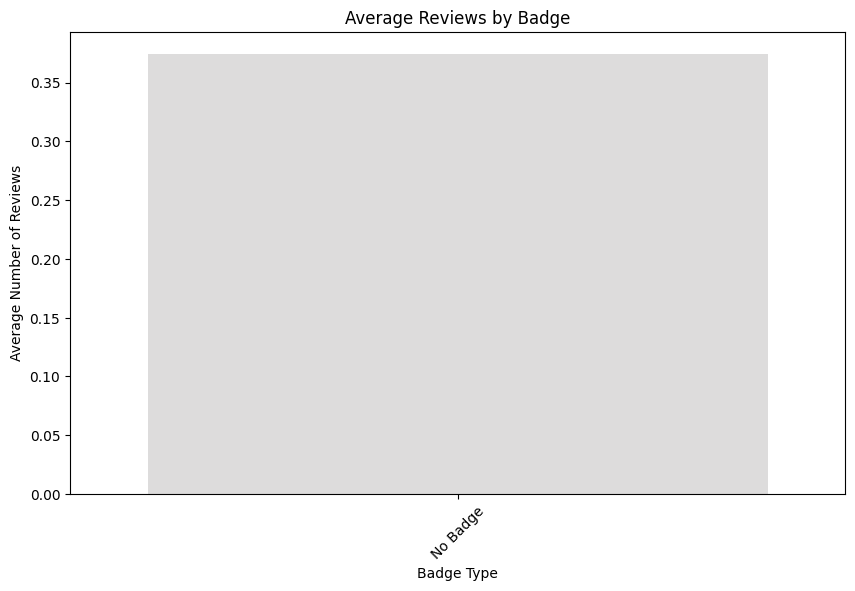

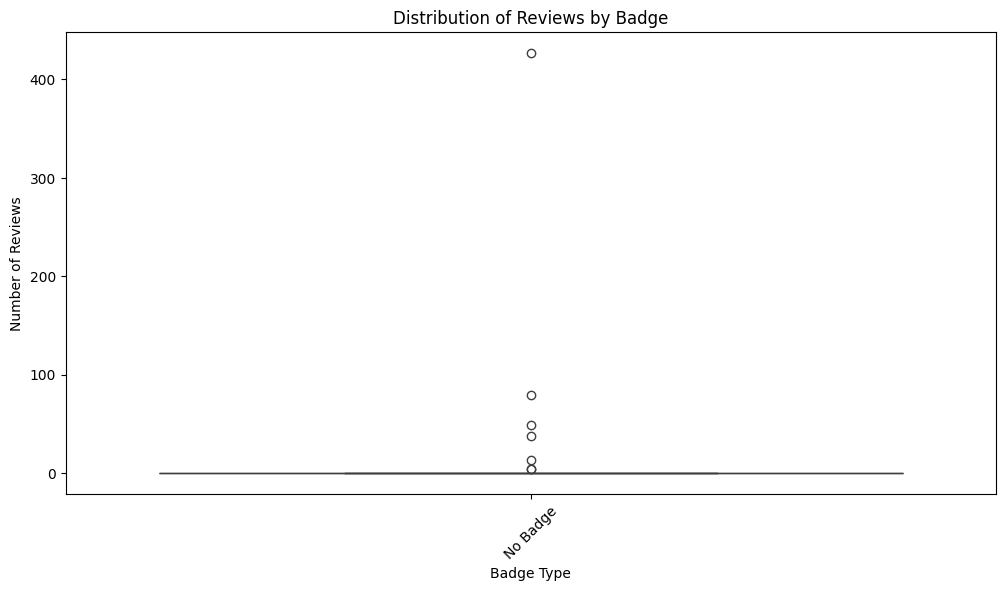

C:\Users\Dell\AppData\Local\Temp\ipykernel_12732\1183303674.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reviews_badges.index, y=top_reviews_badges.values, palette='viridis')


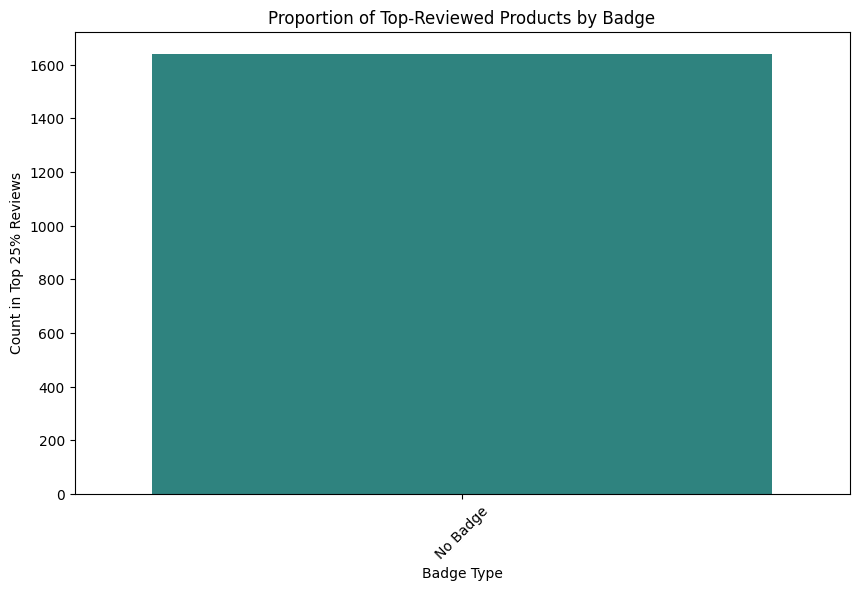

C:\Users\Dell\AppData\Local\Temp\ipykernel_12732\1183303674.py:47: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  products_df['month'] = products_df['scrapedAt'].dt.to_period('M')


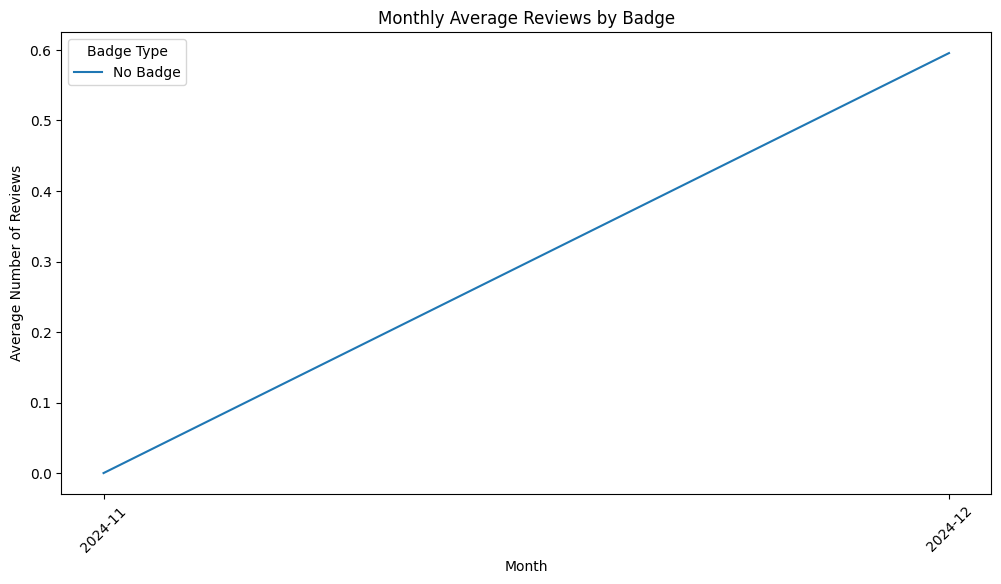

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the badge column is cleaned
products_df['badge_cleaned'] = products_df['badge'].fillna('No Badge')

# Replace NaN reviews with 0 for analysis
products_df['reviews_cleaned'] = products_df['reviews_cleaned'].fillna(0)

# 1. Average Reviews by Badge
badge_avg_reviews = products_df.groupby('badge_cleaned')['reviews_cleaned'].mean().sort_values(ascending=False)

# Bar Plot for Average Reviews by Badge
plt.figure(figsize=(10, 6))
sns.barplot(x=badge_avg_reviews.index, y=badge_avg_reviews.values, palette='coolwarm')
plt.title('Average Reviews by Badge')
plt.xlabel('Badge Type')
plt.ylabel('Average Number of Reviews')
plt.xticks(rotation=45)
plt.show()

# 2. Distribution of Reviews by Badge
plt.figure(figsize=(12, 6))
sns.boxplot(x='badge_cleaned', y='reviews_cleaned', data=products_df)
plt.title('Distribution of Reviews by Badge')
plt.xlabel('Badge Type')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

# 3. Proportion of Top-Reviewed Products by Badge
top_reviews_threshold = products_df['reviews_cleaned'].quantile(0.75)  # Top 25% of products by reviews
top_reviews_badges = products_df[products_df['reviews_cleaned'] >= top_reviews_threshold]['badge_cleaned'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=top_reviews_badges.index, y=top_reviews_badges.values, palette='viridis')
plt.title('Proportion of Top-Reviewed Products by Badge')
plt.xlabel('Badge Type')
plt.ylabel('Count in Top 25% Reviews')
plt.xticks(rotation=45)
plt.show()

# 4. Time-Based Analysis (if timestamp data is available)
if 'scrapedAt' in products_df.columns:
    products_df['scrapedAt'] = pd.to_datetime(products_df['scrapedAt'])
    products_df['month'] = products_df['scrapedAt'].dt.to_period('M')

    monthly_reviews = products_df.groupby(['month', 'badge_cleaned'])['reviews_cleaned'].mean().reset_index()
    monthly_reviews['month'] = monthly_reviews['month'].astype(str)  # Convert month to string for plotting

    plt.figure(figsize=(12, 6))
    sns.lineplot(x='month', y='reviews_cleaned', hue='badge_cleaned', data=monthly_reviews)
    plt.title('Monthly Average Reviews by Badge')
    plt.xlabel('Month')
    plt.ylabel('Average Number of Reviews')
    plt.xticks(rotation=45)
    plt.legend(title='Badge Type')
    plt.show()


Correlation between discount and reviews: nan


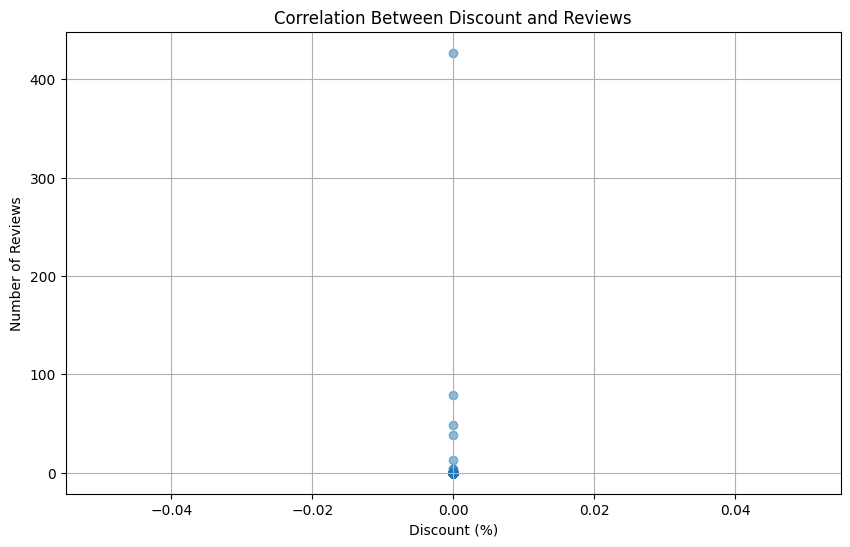

C:\Users\Dell\AppData\Local\Temp\ipykernel_12732\533488476.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_reviews_by_discount = products_df.groupby(discount_bins)['reviews_cleaned'].mean()
C:\Users\Dell\AppData\Local\Temp\ipykernel_12732\533488476.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_reviews_by_discount.index, y=avg_reviews_by_discount.values, palette='coolwarm')


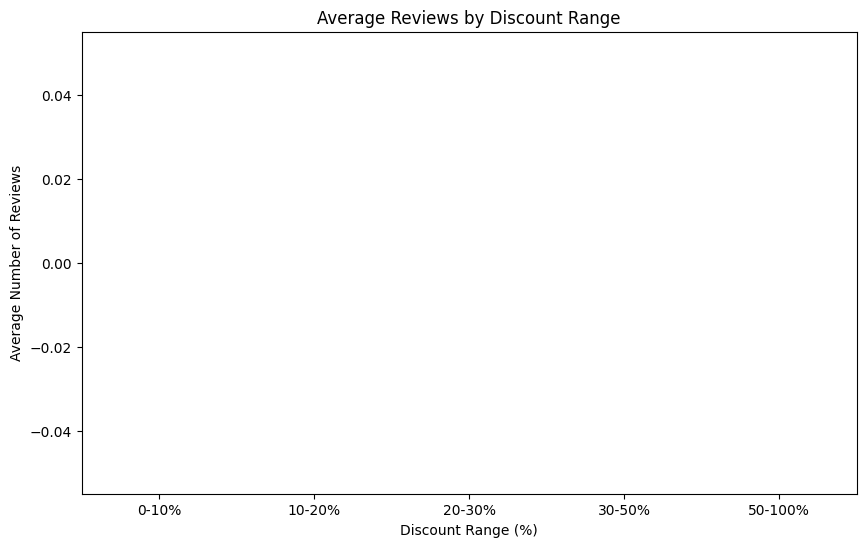

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure discount and reviews columns are numeric
products_df['discount_cleaned'] = products_df['discount_cleaned'].fillna(0)
products_df['reviews_cleaned'] = products_df['reviews_cleaned'].fillna(0)

# 1. Correlation Analysis
correlation = products_df[['discount_cleaned', 'reviews_cleaned']].corr().iloc[0, 1]
print(f"Correlation between discount and reviews: {correlation:.2f}")

# 2. Scatter Plot with Trendline
plt.figure(figsize=(10, 6))
sns.regplot(x='discount_cleaned', y='reviews_cleaned', data=products_df, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title('Correlation Between Discount and Reviews')
plt.xlabel('Discount (%)')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

# 3. Group Analysis: Average Reviews by Discount Range
discount_bins = pd.cut(products_df['discount_cleaned'], bins=[0, 10, 20, 30, 50, 100], labels=['0-10%', '10-20%', '20-30%', '30-50%', '50-100%'])
avg_reviews_by_discount = products_df.groupby(discount_bins)['reviews_cleaned'].mean()

# Bar Plot for Average Reviews by Discount Range
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_reviews_by_discount.index, y=avg_reviews_by_discount.values, palette='coolwarm')
plt.title('Average Reviews by Discount Range')
plt.xlabel('Discount Range (%)')
plt.ylabel('Average Number of Reviews')
plt.show()


In [22]:
pip install pymongo pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pymongo in c:\users\dell\appdata\local\programs\python\python311\lib\site-packages (4.10.1)




[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
# Import required libraries
from pymongo import MongoClient
import pandas as pd

# Connect to MongoDB
def connect_to_mongo(db_name, collection_name, host='localhost', port=27017):
    """
    Connects to a MongoDB database and retrieves a specified collection.
    """
    try:
        client = MongoClient(host, port)  # Default MongoDB host and port
        db = client[db_name]
        collection = db[collection_name]
        print(f"Connected to MongoDB database: {db_name}, collection: {collection_name}")
        return collection
    except Exception as e:
        print(f"Error connecting to MongoDB: {e}")
        return None

# Fetch data from MongoDB collection
def fetch_data_from_mongo(collection):
    """
    Fetches all documents from a MongoDB collection and loads them into a Pandas DataFrame.
    """
    try:
        data = list(collection.find())
        df = pd.DataFrame(data)
        print(f"Successfully loaded {len(df)} records from MongoDB.")
        return df
    except Exception as e:
        print(f"Error fetching data: {e}")
        return pd.DataFrame()

# Main execution
if __name__ == "__main__":
    # Parameters for MongoDB
    DATABASE_NAME = "market_scraper"
    COLLECTION_NAME = "products"
    
    # Connect to MongoDB and fetch data
    collection = connect_to_mongo(DATABASE_NAME, COLLECTION_NAME)
    if collection is not None:
        products_df = fetch_data_from_mongo(collection)

        # Display the first few rows of the DataFrame
        print("Sample data:")
        print(products_df.head())

        # Basic information about the dataset
        print("\nDataset Information:")
        products_df.info()

        # Save to CSV if needed
        products_df.to_csv("products_data.csv", index=False)


Connected to MongoDB database: market_scraper, collection: products
Successfully loaded 1640 records from MongoDB.
Sample data:
                        _id  \
0  674b0b8c888a78dce3230cf1   
1  674b0b8c888a78dce3230cf5   
2  674b0b8c888a78dce3230cf8   
3  674b0b8c888a78dce3230cfb   
4  674b0b8c888a78dce3230cfe   

                                                name  \
0                                                      
1  HP 14 inch Laptop, HD Display, 12th Generation...   
2  15.6" FHD IPS Business Laptop, 32GB RAM 1TB SS...   
3  Acer Aspire 3 A315-24P-R7VH Slim Laptop | 15.6...   
4  Apple 2024 MacBook Air 13-inch Laptop with M3 ...   

                                               price  \
0                                                      
1                                     $249.99$319.00   
2                                     $379.00$779.99   
3                                     $279.99$321.99   
4  $899.00$1,099.00$1,234.00$1,499.00$1,049.00$1,...   

           

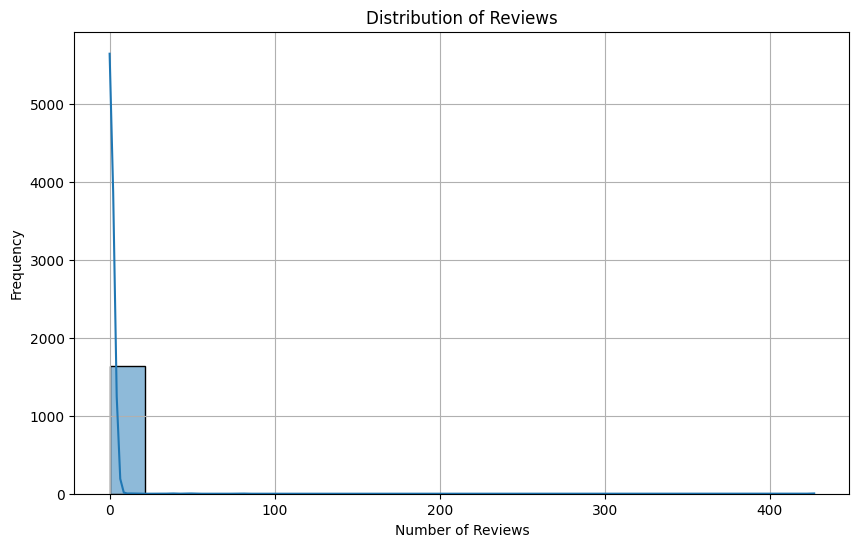

C:\Users\Dell\AppData\Local\Temp\ipykernel_12732\49698602.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reviews_by_price_range = products_df.groupby(price_bins)['reviews_cleaned'].sum()
C:\Users\Dell\AppData\Local\Temp\ipykernel_12732\49698602.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reviews_by_price_range.index, y=reviews_by_price_range.values, palette='viridis')


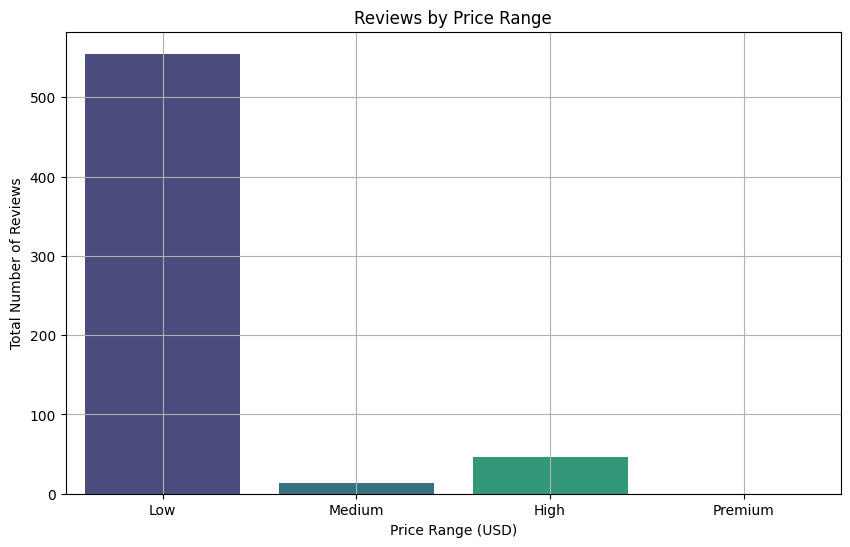

C:\Users\Dell\AppData\Local\Temp\ipykernel_12732\49698602.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reviews_by_badge.index, y=reviews_by_badge.values, palette='coolwarm')


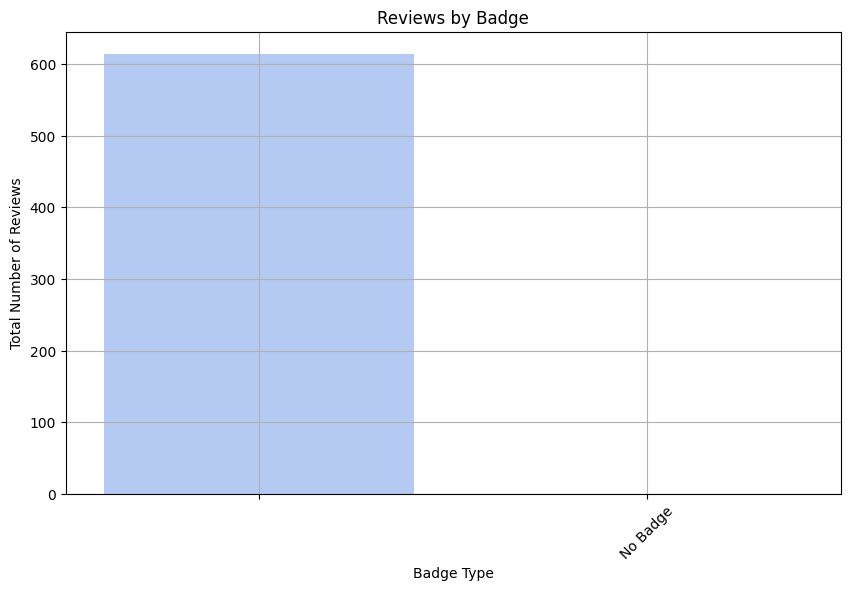

Total Reviews:
614.0

Average Reviews per Product:
0.374390243902439

Top 10 Most Reviewed Products:
                                                   name  reviews_cleaned
1511  Womens Corduroy Overalls Adjustable Straps Bag...            427.0
1495  Summer Tank Tops Embroidery for Women Sleevele...             79.0
1104  Fabric Tape Double Sided for Clothes - Body Ta...             49.0
647   Lenovo 14" Business Laptop Computer, Windows 1...             38.0
657   15.6" Laptop Computer,16GB RAM 256GB SSD, Cele...             13.0
735   Lenovo IdeaPad 5X 2-in-1 Copilot+ - Extra-Long...              4.0
860   Lenovo IdeaPad 5X 2-in-1 Copilot+ - Extra-Long...              4.0
0                                                                    0.0
1     HP 14 inch Laptop, HD Display, 12th Generation...              0.0
2     15.6" FHD IPS Business Laptop, 32GB RAM 1TB SS...              0.0

Reviews by Price Range:
price_cleaned
Low        555.0
Medium      13.0
High        46.0
Premiu

In [46]:
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

# Ensure all fields are prepared for analysis
products_df['reviews_cleaned'] = pd.to_numeric(products_df['reviews'], errors='coerce').fillna(0)
products_df['price_cleaned'] = products_df['price'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)

# Ensure the badge column is cleaned
if 'badge' in products_df.columns:
    products_df['badge_cleaned'] = products_df['badge'].fillna('No Badge')
else:
    products_df['badge_cleaned'] = 'No Badge'

# Analysis Report
report = {}

# 1. Total Number of Reviews
total_reviews = products_df['reviews_cleaned'].sum()
report['Total Reviews'] = total_reviews

# 2. Average Number of Reviews per Product
average_reviews = products_df['reviews_cleaned'].mean()
report['Average Reviews per Product'] = average_reviews

# 3. Top 10 Most Reviewed Products
top_10_reviews = products_df.nlargest(10, 'reviews_cleaned')[['name', 'reviews_cleaned']]
report['Top 10 Most Reviewed Products'] = top_10_reviews

# 4. Distribution of Reviews
plt.figure(figsize=(10, 6))
sns.histplot(products_df['reviews_cleaned'], bins=20, kde=True)
plt.title('Distribution of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 5. Reviews by Price Range
price_bins = pd.cut(products_df['price_cleaned'], bins=[0, 100, 500, 1000, 5000], labels=['Low', 'Medium', 'High', 'Premium'])
reviews_by_price_range = products_df.groupby(price_bins)['reviews_cleaned'].sum()
report['Reviews by Price Range'] = reviews_by_price_range

# Bar Plot for Reviews by Price Range
plt.figure(figsize=(10, 6))
sns.barplot(x=reviews_by_price_range.index, y=reviews_by_price_range.values, palette='viridis')
plt.title('Reviews by Price Range')
plt.xlabel('Price Range (USD)')
plt.ylabel('Total Number of Reviews')
plt.grid(True)
plt.show()

# 6. Reviews by Badge
reviews_by_badge = products_df.groupby('badge_cleaned')['reviews_cleaned'].sum()
report['Reviews by Badge'] = reviews_by_badge

# Bar Plot for Reviews by Badge
plt.figure(figsize=(10, 6))
sns.barplot(x=reviews_by_badge.index, y=reviews_by_badge.values, palette='coolwarm')
plt.title('Reviews by Badge')
plt.xlabel('Badge Type')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Display the report
for key, value in report.items():
    print(f"{key}:\n{value}\n")

In [48]:
# print number of records with non null reviews   
print(products_df['reviews'].count())
# print number of records with null reviews
print(products_df['reviews'].isnull().sum())
# print number of records with non null rating
print(products_df['rating'].count())
# print number of records with null rating
print(products_df['rating'].isnull().sum())
# print number of records with non null price
print(products_df['price'].count())
# print number of records with null price
print(products_df['price'].isnull().sum())
# print number of records with non null discount
print(products_df['discount'].count())
# print number of records with null discount
print(products_df['discount'].isnull().sum())
# print number of records with non null badge
print(products_df['badge'].count())
# print number of records with null badge
print(products_df['badge'].isnull().sum())
# print number of records with non null description
print(products_df['description'].count())
# print number of records with null description
print(products_df['description'].isnull().sum())


1620
20
1620
20
1640
0
1640
0
1620
20
1640
0
